In [38]:
!pip install xgboost

     |████████████████████████████████| 1.7 MB 1.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [62]:
import numpy as np
import pandas as pd
import pickle
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import LinearSVR, SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

In [15]:
df = pd.read_csv('final_data.csv')
df.head()

,Dimensions,Blocks,Threads,Time,Speedup,[CUDA memcpy HtoD] Time,[CUDA memcpy HtoD] Avg,[CUDA memcpy HtoD] Min,[CUDA memcpy HtoD] Max,[CUDA memcpy DtoH] Time,[CUDA memcpy DtoH] Avg,[CUDA memcpy DtoH] Min,[CUDA memcpy DtoH] Max,cudaMalloc Time,cudaMalloc Avg,cudaMalloc Min,cudaMalloc Max,cudaMemcpy Time,cudaMemcpy Avg,cudaMemcpy Min,cudaMemcpy Max,cudaFree Time,cudaFree Avg,cudaFree Min,cudaFree Max,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,10,1,2,0.04,0.4,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
1,10,1,4,0.04,0.4,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
2,10,1,8,0.03,0.3,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
3,10,1,16,0.03,0.3,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
4,10,1,32,0.06,0.6,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0


In [16]:
df = df.sample(frac=1).reset_index(drop=True)

In [17]:
df.head()

,Dimensions,Blocks,Threads,Time,Speedup,[CUDA memcpy HtoD] Time,[CUDA memcpy HtoD] Avg,[CUDA memcpy HtoD] Min,[CUDA memcpy HtoD] Max,[CUDA memcpy DtoH] Time,[CUDA memcpy DtoH] Avg,[CUDA memcpy DtoH] Min,[CUDA memcpy DtoH] Max,cudaMalloc Time,cudaMalloc Avg,cudaMalloc Min,cudaMalloc Max,cudaMemcpy Time,cudaMemcpy Avg,cudaMemcpy Min,cudaMemcpy Max,cudaFree Time,cudaFree Avg,cudaFree Min,cudaFree Max,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,1000000,9,128,0.10,1.250000,0.002846,0.000949,0.000939,0.000954,0.001219,0.001219,0.001219,0.001219,0.258798,0.086266,0.000202,0.258384,0.007014,0.001753,0.001247,0.003230,0.001063,0.000354,0.000283,0.000390,NVIDIA GeForce GTX TITAN X,5.2,12505984.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1215500.0,65536.0,24.0,0.0,2.0,384.0,3505000.0,3145728.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
1,1000,10,1,0.24,1.000000,0.002337,0.000779,0.000775,0.000786,0.002577,0.002577,0.002577,0.002577,0.333979,0.111326,0.000239,0.333499,0.008094,0.002023,0.000998,0.005065,0.000681,0.000227,0.000178,0.000320,NVIDIA TITAN V,7.0,12356288.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1455000.0,65536.0,80.0,0.0,7.0,3072.0,850000.0,4718592.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
2,1000,11,16,0.19,1.266667,0.006557,0.002186,0.002182,0.002193,0.002117,0.002117,0.002117,0.002117,0.224750,0.074917,0.000215,0.224311,0.014055,0.003514,0.002920,0.005266,0.001290,0.000430,0.000265,0.000513,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
3,100000,4,1,0.21,1.400000,0.006557,0.002186,0.002182,0.002193,0.002117,0.002117,0.002117,0.002117,0.224750,0.074917,0.000215,0.224311,0.014055,0.003514,0.002920,0.005266,0.001290,0.000430,0.000265,0.000513,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
4,1000,15,32,0.16,1.066667,0.001814,0.604714,0.598175,0.614112,0.000615,0.614751,0.614751,0.614751,0.229760,76.586785,0.217658,229.315172,0.003828,0.957117,0.790004,1.434818,0.000717,0.239110,0.225932,0.264997,NVIDIA GeForce RTX 2080 Ti,7.5,11283904.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1635000.0,65536.0,68.0,0.0,3.0,352.0,7000000.0,5767168.0,1024.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0


In [18]:
df.columns

Index(['Dimensions', 'Blocks', 'Threads', 'Time', 'Speedup',
       '[CUDA memcpy HtoD] Time', '[CUDA memcpy HtoD] Avg',
       '[CUDA memcpy HtoD] Min', '[CUDA memcpy HtoD] Max',
       '[CUDA memcpy DtoH] Time', '[CUDA memcpy DtoH] Avg',
       '[CUDA memcpy DtoH] Min', '[CUDA memcpy DtoH] Max', 'cudaMalloc Time',
       'cudaMalloc Avg', 'cudaMalloc Min', 'cudaMalloc Max', 'cudaMemcpy Time',
       'cudaMemcpy Avg', 'cudaMemcpy Min', 'cudaMemcpy Max', 'cudaFree Time',
       'cudaFree Avg', 'cudaFree Min', 'cudaFree Max', 'Device Name',
       'Compute Capability', 'Total Global Memory', 'Shared Memory per Block',
       'Registers per Block', 'Warp Size', 'Maximum Threads per Block',
       'Thread Dimension Z', 'Thread Dimension Y', 'Thread Dimension X',
       'Grid Size Z', 'Grid Size Y', 'Grid Size X', 'Clock Rate',
       'Total Constant Memory', 'Multiprocessor Count', 'integrated',
       'Asynchronous Engine Count', 'Memory Bus Width', 'Memory Clock Rate',
       'L2 Cache 

In [19]:
len(df.columns)

62

In [20]:
y = df['Speedup'].values
df.drop(['Speedup', 'Time'], axis = 1, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7030 entries, 0 to 7029
Data columns (total 60 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Dimensions                          7030 non-null   int64  
 1   Blocks                              7030 non-null   int64  
 2   Threads                             7030 non-null   int64  
 3   [CUDA memcpy HtoD] Time             7030 non-null   float64
 4   [CUDA memcpy HtoD] Avg              7030 non-null   float64
 5   [CUDA memcpy HtoD] Min              7030 non-null   float64
 6   [CUDA memcpy HtoD] Max              7030 non-null   float64
 7   [CUDA memcpy DtoH] Time             7030 non-null   float64
 8   [CUDA memcpy DtoH] Avg              7030 non-null   float64
 9   [CUDA memcpy DtoH] Min              7030 non-null   float64
 10  [CUDA memcpy DtoH] Max              7030 non-null   float64
 11  cudaMalloc Time                     7030 no

In [22]:
df['Device Name'].unique().tolist()

['NVIDIA GeForce GTX TITAN X',
 'NVIDIA TITAN V',
 'NVIDIA GeForce GTX TITAN Z',
 'NVIDIA GeForce RTX 2080 Ti',
 'NVIDIA GeForce GTX TITAN Black']

In [23]:
oe = OrdinalEncoder()
gpus = oe.fit_transform(df['Device Name'].values.reshape(-1, 1))

In [24]:
df['Device Name'] = gpus

In [25]:
df.head()

,Dimensions,Blocks,Threads,[CUDA memcpy HtoD] Time,[CUDA memcpy HtoD] Avg,[CUDA memcpy HtoD] Min,[CUDA memcpy HtoD] Max,[CUDA memcpy DtoH] Time,[CUDA memcpy DtoH] Avg,[CUDA memcpy DtoH] Min,[CUDA memcpy DtoH] Max,cudaMalloc Time,cudaMalloc Avg,cudaMalloc Min,cudaMalloc Max,cudaMemcpy Time,cudaMemcpy Avg,cudaMemcpy Min,cudaMemcpy Max,cudaFree Time,cudaFree Avg,cudaFree Min,cudaFree Max,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,1000000,9,128,0.002846,0.000949,0.000939,0.000954,0.001219,0.001219,0.001219,0.001219,0.258798,0.086266,0.000202,0.258384,0.007014,0.001753,0.001247,0.003230,0.001063,0.000354,0.000283,0.000390,1.0,5.2,12505984.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1215500.0,65536.0,24.0,0.0,2.0,384.0,3505000.0,3145728.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
1,1000,10,1,0.002337,0.000779,0.000775,0.000786,0.002577,0.002577,0.002577,0.002577,0.333979,0.111326,0.000239,0.333499,0.008094,0.002023,0.000998,0.005065,0.000681,0.000227,0.000178,0.000320,4.0,7.0,12356288.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1455000.0,65536.0,80.0,0.0,7.0,3072.0,850000.0,4718592.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
2,1000,11,16,0.006557,0.002186,0.002182,0.002193,0.002117,0.002117,0.002117,0.002117,0.224750,0.074917,0.000215,0.224311,0.014055,0.003514,0.002920,0.005266,0.001290,0.000430,0.000265,0.000513,2.0,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
3,100000,4,1,0.006557,0.002186,0.002182,0.002193,0.002117,0.002117,0.002117,0.002117,0.224750,0.074917,0.000215,0.224311,0.014055,0.003514,0.002920,0.005266,0.001290,0.000430,0.000265,0.000513,2.0,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
4,1000,15,32,0.001814,0.604714,0.598175,0.614112,0.000615,0.614751,0.614751,0.614751,0.229760,76.586785,0.217658,229.315172,0.003828,0.957117,0.790004,1.434818,0.000717,0.239110,0.225932,0.264997,3.0,7.5,11283904.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1635000.0,65536.0,68.0,0.0,3.0,352.0,7000000.0,5767168.0,1024.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0


In [26]:
with open('utils/gpu_encoder.pickle', 'wb') as ge:
    pickle.dump(oe, ge)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

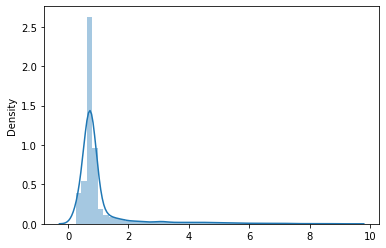

In [27]:
sns.distplot(np.log1p(y))

In [28]:
df.head()

,Dimensions,Blocks,Threads,[CUDA memcpy HtoD] Time,[CUDA memcpy HtoD] Avg,[CUDA memcpy HtoD] Min,[CUDA memcpy HtoD] Max,[CUDA memcpy DtoH] Time,[CUDA memcpy DtoH] Avg,[CUDA memcpy DtoH] Min,[CUDA memcpy DtoH] Max,cudaMalloc Time,cudaMalloc Avg,cudaMalloc Min,cudaMalloc Max,cudaMemcpy Time,cudaMemcpy Avg,cudaMemcpy Min,cudaMemcpy Max,cudaFree Time,cudaFree Avg,cudaFree Min,cudaFree Max,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,1000000,9,128,0.002846,0.000949,0.000939,0.000954,0.001219,0.001219,0.001219,0.001219,0.258798,0.086266,0.000202,0.258384,0.007014,0.001753,0.001247,0.003230,0.001063,0.000354,0.000283,0.000390,1.0,5.2,12505984.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1215500.0,65536.0,24.0,0.0,2.0,384.0,3505000.0,3145728.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
1,1000,10,1,0.002337,0.000779,0.000775,0.000786,0.002577,0.002577,0.002577,0.002577,0.333979,0.111326,0.000239,0.333499,0.008094,0.002023,0.000998,0.005065,0.000681,0.000227,0.000178,0.000320,4.0,7.0,12356288.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1455000.0,65536.0,80.0,0.0,7.0,3072.0,850000.0,4718592.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
2,1000,11,16,0.006557,0.002186,0.002182,0.002193,0.002117,0.002117,0.002117,0.002117,0.224750,0.074917,0.000215,0.224311,0.014055,0.003514,0.002920,0.005266,0.001290,0.000430,0.000265,0.000513,2.0,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
3,100000,4,1,0.006557,0.002186,0.002182,0.002193,0.002117,0.002117,0.002117,0.002117,0.224750,0.074917,0.000215,0.224311,0.014055,0.003514,0.002920,0.005266,0.001290,0.000430,0.000265,0.000513,2.0,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
4,1000,15,32,0.001814,0.604714,0.598175,0.614112,0.000615,0.614751,0.614751,0.614751,0.229760,76.586785,0.217658,229.315172,0.003828,0.957117,0.790004,1.434818,0.000717,0.239110,0.225932,0.264997,3.0,7.5,11283904.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1635000.0,65536.0,68.0,0.0,3.0,352.0,7000000.0,5767168.0,1024.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0


In [29]:
X = df.values

In [30]:
#sc = RobustScaler()
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.225, random_state = 42)

In [42]:
def evaluate_model(model, X_train, y_train, X_val, y_val, metric='R2'):
    model.fit(X_train, y_train)
    if metric == 'RMSE':
        y_pred_train = model.predict(X_train)
        print('Training RMSE score = {}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
        y_pred = model.predict(X_val)
        print('Validation RMSE score = {}'.format(np.sqrt(mean_squared_error(y_val, y_pred))))
    else:
        print('Training R2 score = {}'.format(model.score(X_train, y_train)))
        print('Validation R2 score = {}'.format(model.score(X_val, y_val)))

In [33]:
lr = LinearRegression()
evaluate_model(lr, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 223.9527525062917
Validation RMSE score = 157.51858524635801


In [34]:
lasso = Lasso()
evaluate_model(lasso, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 225.44682135670047
Validation RMSE score = 156.93472027996745


In [35]:
ridge = Ridge()
evaluate_model(ridge, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 223.97054805762568
Validation RMSE score = 157.11795930428838


In [36]:
svr = SVR()
evaluate_model(svr, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 276.5317763114915
Validation RMSE score = 199.80191195954086


In [37]:
lsvr = LinearSVR()
evaluate_model(lsvr, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 252.15377697406356
Validation RMSE score = 199.284216437365


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [56]:
xgb = XGBRegressor(n_estimators = 150)
evaluate_model(xgb, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 1.7933634409181836
Validation RMSE score = 48.53160194073152


In [52]:
mlp = MLPRegressor(hidden_layer_sizes=(320,5))
evaluate_model(mlp, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 166.6407812947002
Validation RMSE score = 82.89300148355557


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [61]:
rfr = RandomForestRegressor(n_estimators = 200, max_depth = 15)
evaluate_model(rfr, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 57.8151444148996
Validation RMSE score = 134.25051730732426


In [63]:
rfe = RFE(rfr)
rfe = rfe.fit(X_train, y_train)
columns = [df.columns.tolist()[i] for i in range(len(df.columns.tolist())) if rfe.support_[i]]

In [64]:
columns

['Dimensions',
 'Blocks',
 'Threads',
 '[CUDA memcpy HtoD] Time',
 '[CUDA memcpy HtoD] Avg',
 '[CUDA memcpy HtoD] Min',
 '[CUDA memcpy HtoD] Max',
 '[CUDA memcpy DtoH] Time',
 '[CUDA memcpy DtoH] Avg',
 '[CUDA memcpy DtoH] Min',
 '[CUDA memcpy DtoH] Max',
 'cudaMalloc Time',
 'cudaMalloc Avg',
 'cudaMalloc Min',
 'cudaMalloc Max',
 'cudaMemcpy Time',
 'cudaMemcpy Min',
 'cudaMemcpy Max',
 'cudaFree Time',
 'cudaFree Avg',
 'cudaFree Min',
 'cudaFree Max',
 'Device Name',
 'Compute Capability',
 'Total Global Memory',
 'Clock Rate',
 'Multiprocessor Count',
 'Asynchronous Engine Count',
 'Memory Bus Width',
 'L2 Cache Size']

In [65]:
tdf = df[columns]

In [66]:
X_new = sc.fit_transform(tdf.values)

In [67]:
X_train, X_val, y_train, y_val = train_test_split(X_new, y, test_size = 0.225, random_state = 42)

In [70]:
rfr = RandomForestRegressor(n_estimators = 250, max_depth = 15)
evaluate_model(rfr, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 56.46973042502737
Validation RMSE score = 134.6628870933078


In [71]:
xgb = XGBRegressor(n_estimators = 150)
evaluate_model(xgb, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 1.4419913882828215
Validation RMSE score = 48.33743121341083


In [72]:
y_pred = xgb.predict(X_val)

In [76]:
y_pred[7]

0.519702

In [77]:
y_val[7]

1.8125